# Project 1 in Scientific Computing
## By Samuel Kaplan and Semyon Lomasov

### Suggested Activity 1

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
def f_param(L1, L2, L3, gamma, x1, x2, y2, p1, p2, p3):
    '''
    Defines the parameters of the theta function in the 2-dimensional Stewart forward kinematics problem.
    
    Theta is a variable that the equation solves for.
    
    L1, L2,  L3, gamma, x1, x2, y2, p1, p2, p3 are given parameters.
    
    '''
    def f_theta(theta,find_x_y=False):
        '''1-variable function of theta to be solved'''
        A2 = L3*np.cos(theta)-x1
        B2 = L3*np.sin(theta)
        A3 = L2*(np.cos(theta)*np.cos(gamma)-np.sin(theta)*np.sin(gamma))-x2
        B3 = L2*(np.cos(theta)*np.sin(gamma)+np.sin(theta)*np.cos(gamma))-y2
        N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
        N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
        D = 2*(A2*B3-B2*A3)
        if(find_x_y==True):
            return theta, N1/D, N2/D
        else:
            return N1**2+N2**2-(p1*D)**2
    return f_theta
    

In [5]:
#Setting the parameters for 1
f_theta_1 = f_param(2,2**(1/2),2**(1/2),math.pi/2,4,0,4,5**(1/2),5**(1/2),5**(1/2))

#Testing: should give 0 in both cases
print(f_theta_1(math.pi/4), f_theta_1(-math.pi/4))

-2.2737367544323206e-13 -2.2737367544323206e-13


### Suggested Activity 2

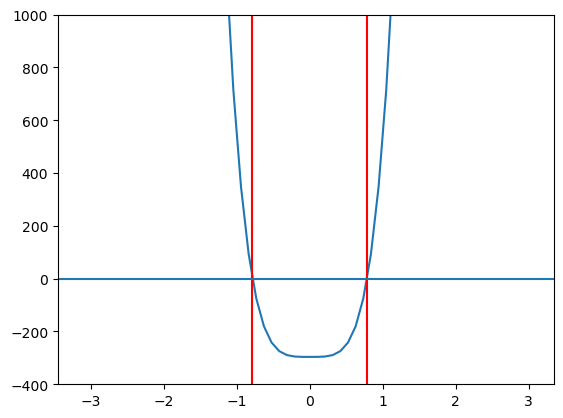

In [6]:
#Plot the function on (-pi,pi)

th_plot_2 = np.arange(-math.pi,math.pi, math.pi/30)
plt.plot(th_plot_2,np.vectorize(f_theta_1)(th_plot_2))

#Add y limit, vertical lines at x=+-pi/4, and a horizontal line at y=0
plt.ylim(-400,1000)
plt.axvline(-math.pi/4,color='red')
plt.axvline(math.pi/4,color='red')
plt.axhline(0)

plt.show()

### Suggested Activity 3

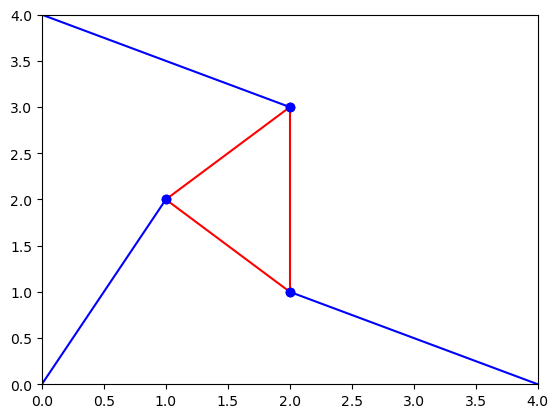

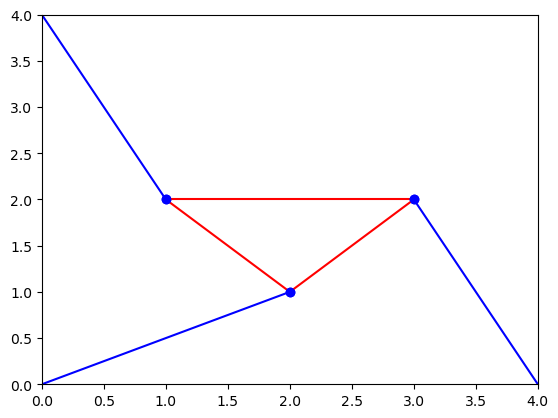

In [7]:
plt.ylim(0, 4)
plt.xlim(0, 4)
plt.plot([0, 1], [0, 2], 'b')
plt.plot([1, 2], [2, 1], 'r', [1, 2], [2, 1], 'bo')
plt.plot([2, 2], [1, 3], 'r', [2, 2], [1, 3], 'bo')
plt.plot([2, 4], [1, 0], 'b')
plt.plot([1, 2], [2, 3], 'r', [1, 2], [2, 3], 'bo')
plt.plot([0, 2], [4, 3], 'b')
plt.show()


plt.ylim(0, 4)
plt.xlim(0, 4)
plt.plot([1, 2], [2, 1], 'r', [1, 2], [2, 1], 'bo')
plt.plot([1, 3], [2, 2], 'r', [1, 3], [2, 2], 'bo')
plt.plot([2, 3], [1, 2], 'r', [2, 3], [1, 2], 'bo')
plt.plot([0, 2], [0, 1], 'b')
plt.plot([0, 1], [4, 2], 'b')
plt.plot([3, 4], [2, 0], 'b')
plt.show()

### Suggested Activity 4

In [8]:
# Setting parameters for 4
f_theta_4 = f_param(3,3*2**(1/2),3,math.pi/4,5,0,6,5,5,3)

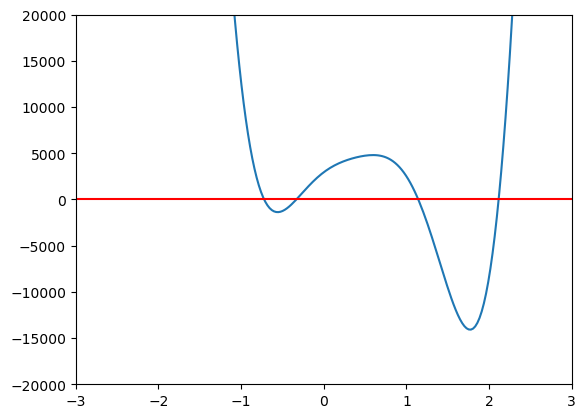

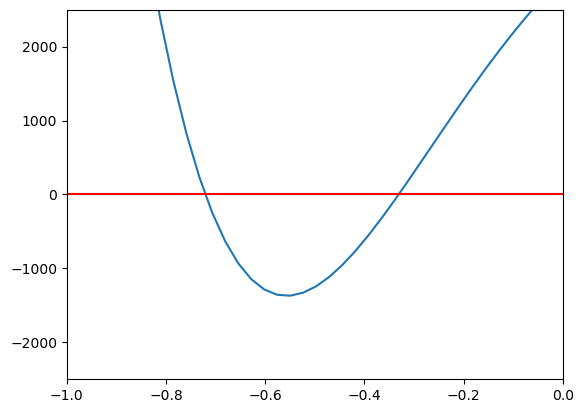

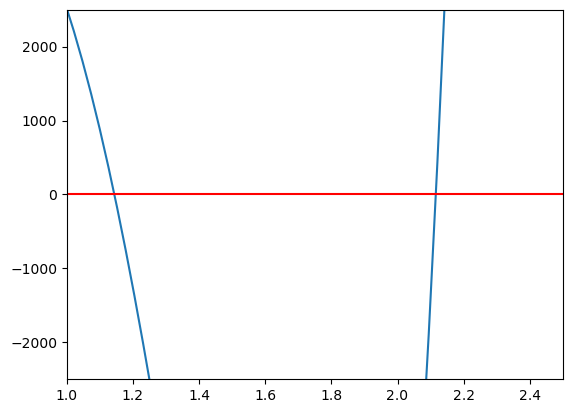

In [9]:
#Plotting 4 on multiple plots to get a better sense of the function and its roots
th_plot_4 = np.arange(-math.pi,math.pi,math.pi/120)

#Plotting function
def f_plotgraph(x,y,xlimmin, xlimmax, ylimmin, ylimmax):    
    plt.plot(x, y)
    plt.xlim(xlimmin,xlimmax)
    plt.ylim(ylimmin,ylimmax)
    plt.axhline(0, color='r')
    #plt.show
    
#Shows the whole graph 
f_plotgraph(th_plot_4,np.vectorize(f_theta_4)(th_plot_4),-3,3,-20000,20000)
plt.show()

#Shows the first two times the line intersects with zero and when derivative approaches zero when -1<x<0
f_plotgraph(th_plot_4,np.vectorize(f_theta_4)(th_plot_4),-1,0,-2500,2500)
plt.show()

#Shows the second two times the line intersects with zero and when derivative approaches zero when 1<x<2.5 
f_plotgraph(th_plot_4,np.vectorize(f_theta_4)(th_plot_4),1,2.5,-2500,2500)
plt.show()

In [10]:
#We can try to guess some roots from the plot. Let's try:

#It seems from the graph that the roots are between -0.8 and -0.6; -0.4 and -0.2; 1 and 1.2; 2 and 2.2.
#Since the function is strictly increasing/decreasing around each root, we can try some value,
#And then either increase or decrease it depending on the sign of f(x). After 10 minutes of trying, we have:

in_guess=[-0.72085,-0.331, 1.14369, 2.11591]
back_error=np.vectorize(f_theta_4)(in_guess)
print(back_error)

#Thus the roots are 'approximately' at -0.72085, -0.331, 1.1437, 2.11591

[ 0.01486613  0.04954393 -0.09477439  0.09028892]


#### Choosing the method:

1) FPI

Since the function f(x) is cumbersome, the only tractable way of making it of the form g(x)=x is by defining 
g(x):=f(x)+x.
Then the derivative g'=f'+1.
Since the function is approximately linear around each root, we can roughly estimate the derivative based on the graph. The function is very steep around each root, so clearly |g'(r)|>1, and therefore the FPI method will diverge. 


2) Bisection

We can estimate f(a), f(b) s.t. f(a)* f(b)<0 around each root reasonably well. We also know that the bisection method converges. Therefore it might be a good choice - but let's see if the Newton's method will be more appropriate.


3) Newton

The quadratic constant of convergence of Newton's method is

M = $|\frac{f''(r)}{2f'(r)}|$

Since the function is approximately linear around each root, we can estimate based on the graph that |f'(r)| is very large. Let's estimate the second derivative f''(r), then then Newton's method should converge very quickly given a good initial guess if f''(r) is small compared to f'(r)

Since the function is approximately linear around each root, we can define the derivative as 
$\frac{y_1-y_0}{x_1-x_0}$.

Let r be the root, and epsilon (e) be the step. Then, f'(r):= $\frac{f(r+e)-f(r)}{e}$

In [11]:
def derivative(f, r, e=0.00001):
    '''f is the function, r is the point at which we estimate the derivative, e is the step in f(r+e)'''
    return (f(r+e)-f(r))/e

def derivative_second(f,r,e=0.00001):
    return (derivative(f, r+e, e)-derivative(f, r, e))/e

In [12]:
#Testing the derivatives:

x_squared = lambda x: x**2
x_cubed = lambda x: x**3

#First derivative
print(derivative(x_squared,2))
print(derivative(x_cubed,2))

#Second derivative
print(derivative_second(x_squared,2))
print(derivative_second(x_cubed,2))

#The derivative function is correct

4.000010000027032
12.000060000261213
2.000000165480742
12.000036520021238


In [13]:
#Checking the first and second derivatives at the roots and finding M

def M_finder(f,r):
    ''' f is the function, r is the root'''
    print('First derivatives, at roots from left to right')
    deriv_r=np.vectorize(derivative)(f,r)
    print(deriv_r)
    print()

    print('Second Derivatives, at roots from left to right')
    deriv_r_second = np.vectorize(derivative_second)(f,r)
    print(deriv_r_second)

    print()
    print('Ratio M')
    M=np.absolute(deriv_r_second/(2*deriv_r))
    print(M)

M_finder(f_theta_4,[-0.721,-0.33, 1.144, 2.116])

print()
print('Initial Guess')
print(in_guess)

print()
print('Backwards Error')
print(back_error)

First derivatives, at roots from left to right
[-18708.74455853   9568.18906943 -21160.28699875  91611.70847365]

Second Derivatives, at roots from left to right
[150621.70859892  11435.00412581 -49072.29595119 343104.76621613]

Ratio M
[4.02543602 0.59755321 1.15953758 1.87260325]

Initial Guess
[-0.72085, -0.331, 1.14369, 2.11591]

Backwards Error
[ 0.01486613  0.04954393 -0.09477439  0.09028892]


Recall that the error evolves approximately as e(i+1)=Me^2 <br>
Given the M above, initial error of approximately <0.5 will yield convergence <br>
Since the backwards error of the initial guess is of order $10^{-2}$, we can hypothesise that the forwards error is small enough

In [14]:
#f(x)<pr is the stopping condition - preferred
def solver_Newton(f,x,pr,stop=30):
    '''f is the function to be solved, x is initial guess, pr is desired precision, stop is the number of operations'''
    count=0 
    while (np.absolute(f(x))>pr) and (count<stop):
        x=x-(f(x)/derivative(f,x))
    return x, f(x)

In [15]:
#Collects key values of the steps of the Newton Method, in line with the table on Page 55 of the textbook, in order to check the function
#is working correctly and identify its convergence rate
def speed_check_Newton(f,x,pr,stop=30):
    '''f is the function to be solved, x is initial guess, pr is desired precision, stop is the number of operations'''
    count=0
    xilist = [x]  
    while (np.absolute(f(x))>pr) and (count<stop):
        x=x-(f(x)/derivative(f,x))
        xilist.append(x)
    eilist = []
    for i in xilist:
        eilist.append(abs(i-x))
    coverg = []
    k = 0
    while k + 1 < len(eilist):
        m = eilist[k+1]/eilist[k]**2
        coverg.append(m) 
        k = k + 1
    return "x-values", xilist, "e-values", eilist , "m-values", coverg
     

In [16]:
#|x(i+1)-x(i)|<pr is the stopping condition - rejected
def solver_Newton_2(f,x,pr,stop=30):
    '''f is the function to be solved, x is initial guess, pr is desired precision, stop is the number of operations'''
    count=0
    x1=x+pr
    while (np.absolute(f(x)/derivative(f,x))>pr) and (count<stop):
        x1=x-(f(x)/derivative(f,x))
        x=x1
    return x, f(x)

In [17]:
#Reports running time of function
def running_time(start,finish,input_amount):
    time = finish - start
    print("Function ran for ", time, " nanoseconds with ", input_amount, " inputs")

In [18]:
np.set_printoptions(precision=16)

#Using solver_Newton
#Precision of 10^(-11) is the smallest that the code runs fast with. At 10^(-12), the code becomes slow
#Times running time of function
x = time.process_time_ns()
roots, f_at_roots =np.vectorize(solver_Newton)(f_theta_4,in_guess,10**(-11))
y= time.process_time_ns()
running_time(x,y,len(in_guess))
print('roots')
print(roots)

print()
print('backwards error at the roots')
print(f_at_roots)

print()
print('x(i+1)-x(i) at the roots')
x_error=f_theta_4(roots)/derivative(f_theta_4,roots)
print(x_error)

Function ran for  2640000  nanoseconds with  4  inputs
roots
[-0.7208492044603892 -0.3310051842838695  1.1436855178213738
  2.1159090140864585]

backwards error at the roots
[0.000000000000000e+00 7.275957614183426e-12 3.637978807091713e-12
 0.000000000000000e+00]

x(i+1)-x(i) at the roots
[-0.000000000000000e+00  7.613550743016012e-16 -1.720503372376889e-16
  0.000000000000000e+00]


The obtained solution for roots 1 and 4 is perfectly accurate up to computer precision. <br>
Roots 2 and 3 are accurate up to $10^{-11}$. <br>
Convergence of x's is accurate up to $10^{-15}$.

In [19]:
#Find x and y for given theta

th_4,x_4,y_4 = np.vectorize(f_theta_4)(roots,True)

print('Values of theta, x and y respectively, at each of the 4 roots, left to right')
for i in range(4):
    print()
    print(th_4[i],x_4[i],y_4[i])

Values of theta, x and y respectively, at each of the 4 roots, left to right

-0.7208492044603892 -1.378379630597699 4.806253176222966

-0.3310051842838695 -0.9147087168343382 4.9156187772596125

1.1436855178213738 4.48175006539903 2.2167355167668954

2.1159090140864585 4.5718301753324555 2.0244428487659536


In [20]:
def solve_and_plot(L1, L2, L3, gamma, x1, x2, y2, x, y, theta):
    ''' Solves for p1,p2,p3 and plots the position once x,y,theta are known'''
    p1x=x
    p1y=y
    p2x=p1x+L2*np.cos(theta+gamma)
    p2y=p1y+L2*np.sin(theta+gamma)
    p3x=p1x+L3*np.cos(theta)
    p3y=p1y+L3*np.sin(theta)
    
    p1=(p1x**2+p1y**2)**(1/2)
    p2=((p3x-x1)**2+p3y**2)**(1/2)
    p3=((p2x-x2)**2+(p2y-y2)**2)**(1/2)
    
    print(p1,p2,p3)
    
    plt.xlim(-2, 6)
    plt.ylim(0, 8)
    
    #Plotting the inner triangle
    plt.plot([p1x,p2x],[p1y,p2y],'r')
    plt.plot([p1x,p3x],[p1y,p3y],'r')
    plt.plot([p2x,p3x],[p2y,p3y],'r')
    
    #Plotting the struts
    plt.plot([0, p1x], [0, p1y], 'b')
    plt.plot([x2, p2x], [y2, p2y], 'b')
    plt.plot([x1, p3x], [0, p3y], 'b')
    
    plt.axvline(0,color='black', ls='--')
    plt.show()

5.0 5.0 2.9999999999999996


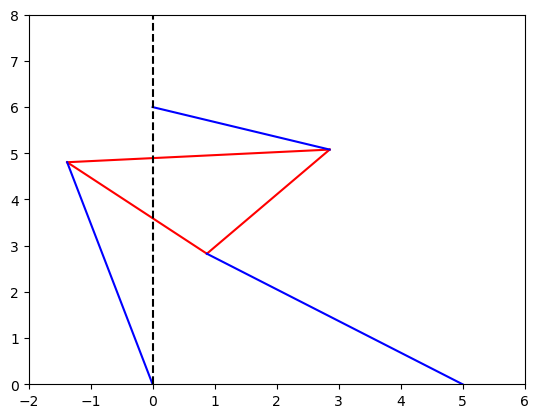

In [21]:
#root 1
solve_and_plot(3,3*2**(1/2),3,math.pi/4,5,0,6,x_4[0],y_4[0],th_4[0])

5.000000000000001 5.000000000000001 3.0000000000000004


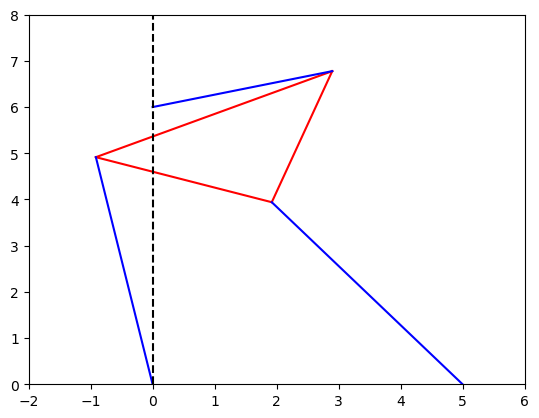

In [22]:
#root 2
solve_and_plot(3,3*2**(1/2),3,math.pi/4,5,0,6,x_4[1],y_4[1],th_4[1])

5.000000000000001 5.0 3.0000000000000004


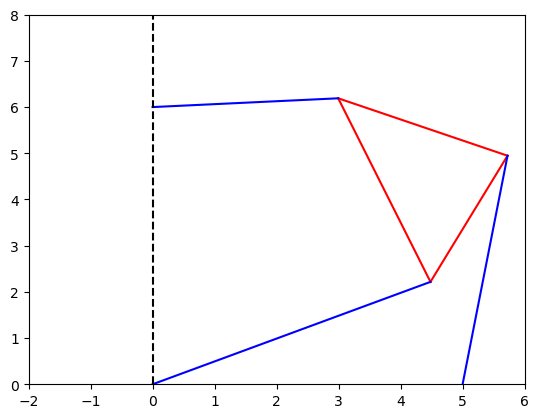

In [23]:
#root 3
solve_and_plot(3,3*2**(1/2),3,math.pi/4,5,0,6,x_4[2],y_4[2],th_4[2])

5.0 5.000000000000001 3.0000000000000013


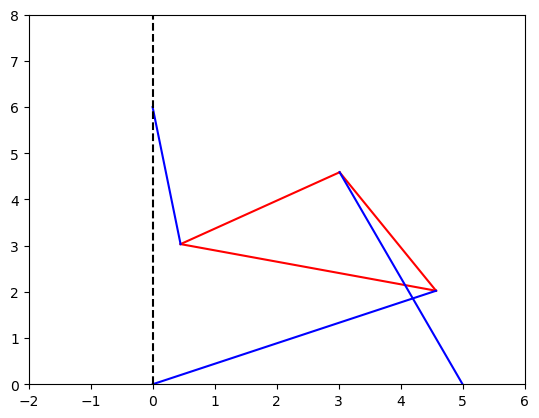

In [24]:
#root 4
solve_and_plot(3,3*2**(1/2),3,math.pi/4,5,0,6,x_4[3],y_4[3],th_4[3])

We see that the strut lenghts are indeed (5,5,3) in all cases, with precision of around $10^{-14}$. We thus conclude that the solution is correct.

In [25]:
#Recalculate M once we know the roots:

print(roots)

M_finder(f_theta_4, roots)

#Since the initial guess was so close to the root, the value of M is also very close

[-0.7208492044603892 -0.3310051842838695  1.1436855178213738
  2.1159090140864585]
First derivatives, at roots from left to right
[-18686.036359576974   9556.589112980873 -21144.851358621963
  91580.49208926967 ]

Second Derivatives, at roots from left to right
[150552.51424200833   11643.387551885096 -49092.377594206475
 343075.37134736776 ]

Ratio M
[4.0284764340846175 0.6091811322132543 1.1608588956618204
 1.8730810651953536]


In [26]:
#Empirically checking that the solver the theoretical convergance rate. m-values displayed are numerical.
print()
print('Solver Convergence Check')
for i in in_guess:
    print(speed_check_Newton(f_theta_4,i,10**(-11)) )


Solver Convergence Check
('x-values', [-0.72085, -0.7208492044308906, -0.7208492044603892], 'e-values', [7.95539610742857e-07, 2.949862576429041e-11, 0.0], 'm-values', [46.60989957739009, 0.0])
('x-values', [-0.331, -0.33100518423591285, -0.3310051842838695], 'e-values', [5.184283869474893e-06, 4.795663866019595e-11, 0.0], 'm-values', [1.784313609415096, 0.0])
('x-values', [1.14369, 1.1436855178967267, 1.1436855178213747, 1.1436855178213738], 'e-values', [4.482178626252775e-06, 7.53528350827537e-11, 8.881784197001252e-16, 0.0], 'm-values', [3.750777277238687, 156423.14844399737, 0.0])
('x-values', [2.11591, 2.115909014106746, 2.115909014086459, 2.1159090140864585], 'e-values', [9.859135414735931e-07, 2.028732737358041e-11, 4.440892098500626e-16, 0.0], 'm-values', [20.871188192645057, 1078997.768046236, 0.0])


We can see that, even though the function converges very quickly, in some cases the actual M-values are different from the theoretical m-values. This may happen because convergence happens too quickly: around the fourth iteration, the error is already beyond machine precision. Therefore the theoretical definition of M, which involves taking the limit, may not be applicable to such small number of iterations.

In [27]:
#Using solver_Newton_2: rejected
#Goes up to precision of 10^(-15). Gives less precision than solver_Newton
roots_2, f_at_roots_2 =np.vectorize(solver_Newton_2)(f_theta_4,in_guess,10**(-15))
print(roots_2)
print(f_at_roots_2)

[-0.7208492044603892 -0.3310051842838695  1.1436855178213747
  2.115909014086459 ]
[ 0.0000000000000000e+00  7.2759576141834259e-12 -1.8189894035458565e-11
  5.8207660913467407e-11]


### Suggested Activity 5
Change strut length to p2 = 7 and re-solve the problem. For these parameters, there
are six poses.

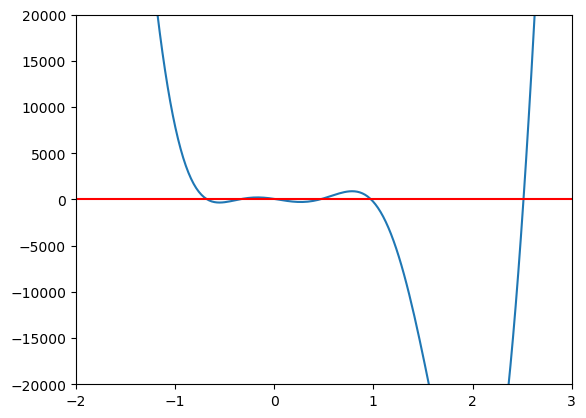

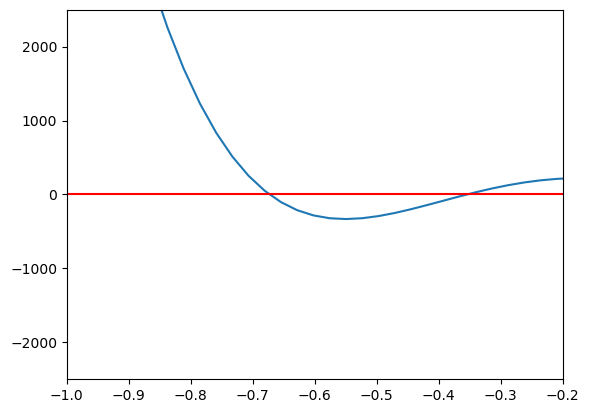

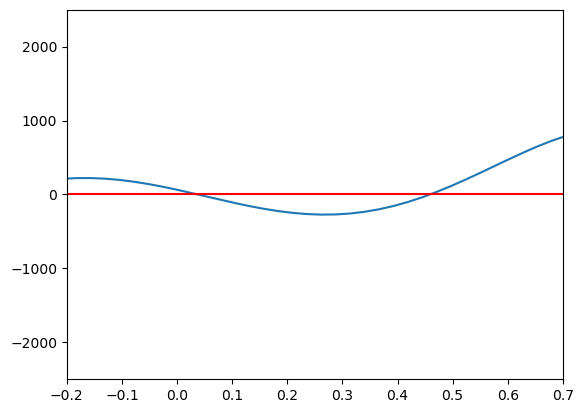

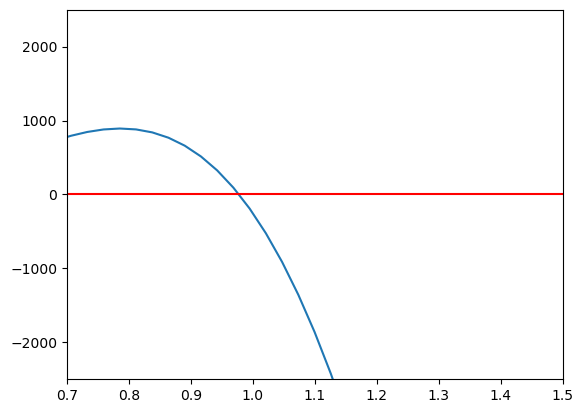

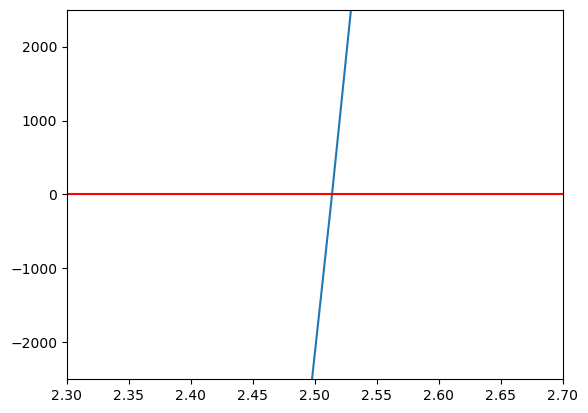

In [28]:
# Setting parameters for 5
f_theta_5 = f_param(3,3*2**(1/2),3,math.pi/4,5,0,6,5,7,3)

#Plotting 4 on multiple plots to get a better sense of the function and its roots
th_plot_5 = np.arange(-math.pi,math.pi,math.pi/120)
    
#Shows the whole graph 
f_plotgraph(th_plot_5,np.vectorize(f_theta_5)(th_plot_5),-2,3,-20000,20000)
plt.show()

#Shows the first two times the line intersects with zero and when derivative approaches zero when -1<x<-.2
f_plotgraph(th_plot_5,np.vectorize(f_theta_5)(th_plot_5),-1,-.2,-2500,2500)
plt.show()

#Shows the second two times the line intersects with zero and when derivative approaches zero when -.2<x<.7
f_plotgraph(th_plot_5,np.vectorize(f_theta_5)(th_plot_5),-.2,.7,-2500,2500)
plt.show()

#Shows the fifth time the line intersects with zero and when derivative approaches zero when .7<x<1.5 
f_plotgraph(th_plot_5,np.vectorize(f_theta_5)(th_plot_5),.7,1.5,-2500,2500)
plt.show()

#Shows the sixth time the line intersects with zero when 2.3<x<2.7 
f_plotgraph(th_plot_5,np.vectorize(f_theta_5)(th_plot_5),2.3,2.7,-2500,2500)
plt.show()

In [29]:
np.set_printoptions(precision=16)

#Using solver_Newton
#Precision of 10^(-10) is the smallest that the code runs fast with. At 10^(-11), the code becomes slow
input_guess = [-.67, -.35, .02, .45, .97, 2.53]
roots_5, f_at_roots_5 =np.vectorize(solver_Newton)(f_theta_5,input_guess,10**(-10))
print('roots')
print(roots_5)

print()
print('f_at_roots')
print(f_at_roots_5)

roots
[-0.6731574863716726 -0.3547402704156592  0.0377667605759145
  0.4588781810489894  0.9776728950003626  2.513852799350384 ]

f_at_roots
[-7.2759576141834259e-12  3.2741809263825417e-11 -2.2737367544323206e-12
 -1.1368683772161603e-13  3.6379788070917130e-12 -5.8207660913467407e-11]


In [30]:
#Find x and y for given theta, in activity 5

th_5,x_5,y_5 = np.vectorize(f_theta_5)(roots_5,True)

print('Values of theta, x and y respectively, at each of the 6 roots, left to right')
for i in range(6):
    print()
    print(th_5[i],x_5[i],y_5[i])

Values of theta, x and y respectively, at each of the 6 roots, left to right

-0.6731574863716726 -4.3147595995682595 2.5264302084034593

-0.3547402704156592 -4.8048965190747674 1.3831013849256406

0.037766760575914465 -4.949024616818952 0.7121483989450559

0.45887818104898936 -0.8198001690662363 4.93233491186466

0.9776728950003626 2.3035540991463486 4.437751515385473

2.513852799350384 3.2156960361510807 3.8287464009884777


### Suggested Activity 6
Find a strut length p2, with the rest of the parameters as in Step 4, for which there are only two poses.

p2= 1


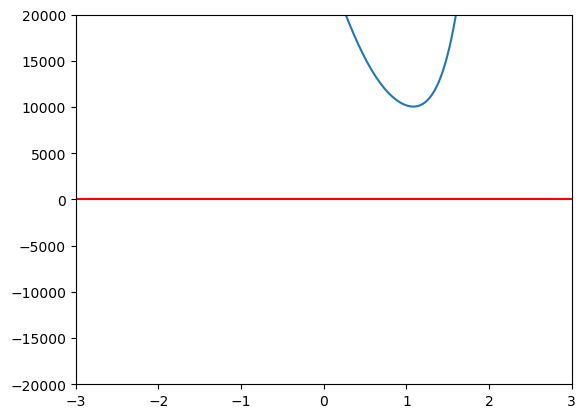

p2= 2


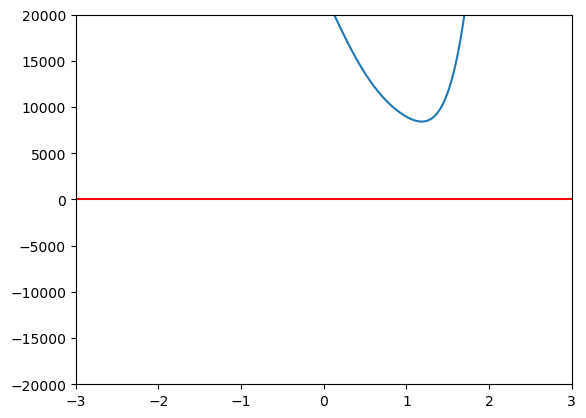

p2= 3


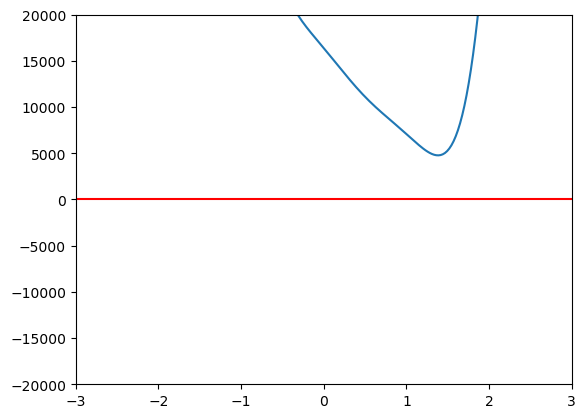

p2= 4


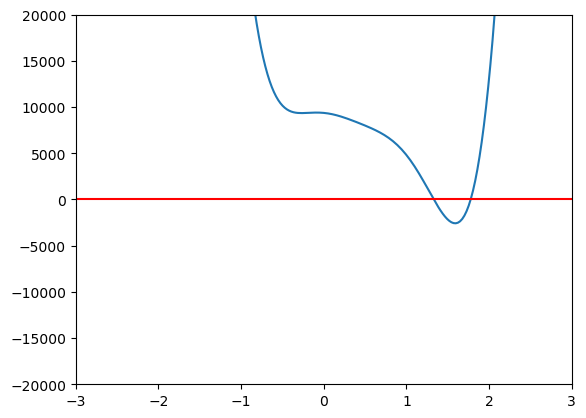

p2= 5


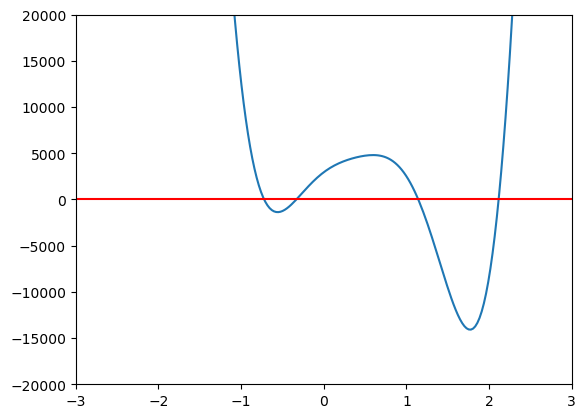

p2= 6


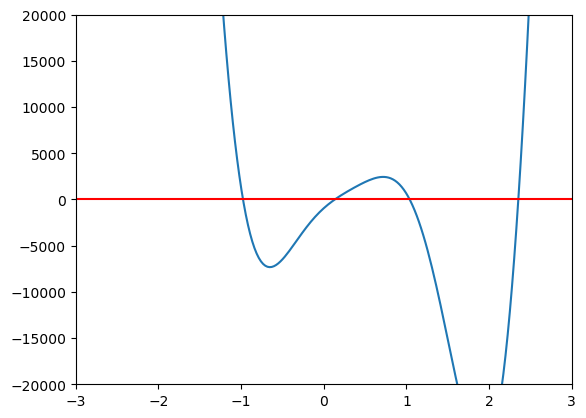

p2= 7


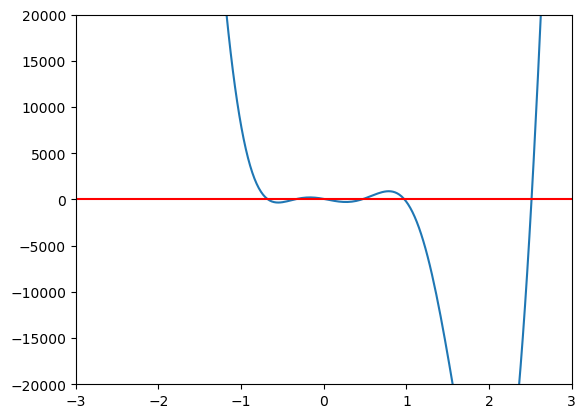

p2= 8


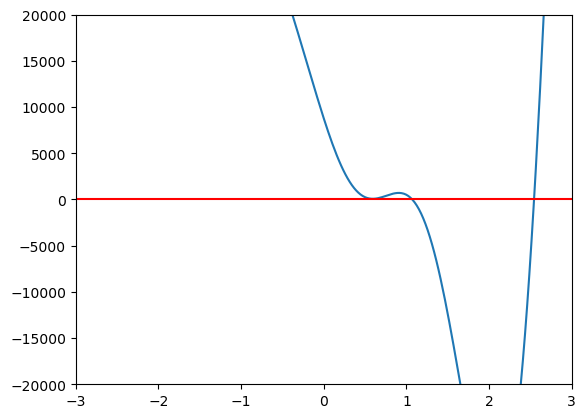

p2= 9


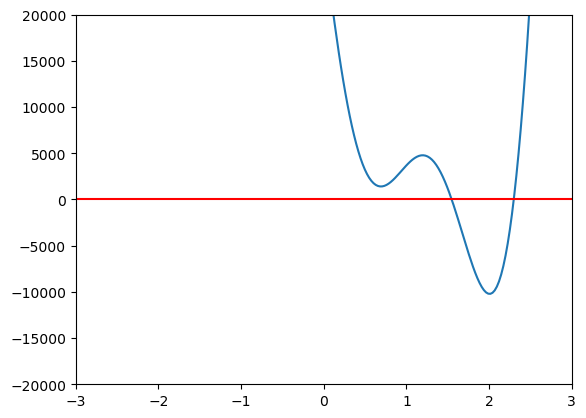

p2= 10


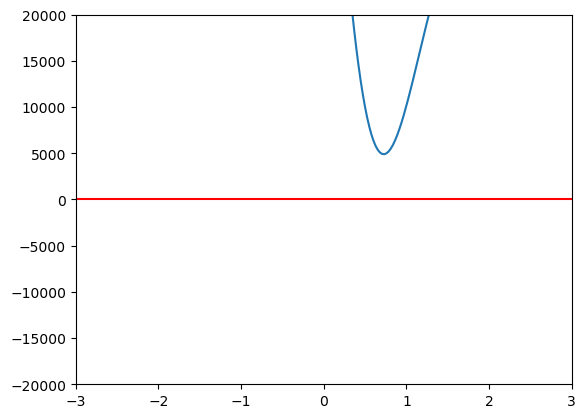

In [31]:
th_plot_6 = np.arange(-math.pi,math.pi,math.pi/120)
# Graphing different values for strut length p2
for i in range(1,11):
    f_theta_6 = f_param(3,3*2**(1/2),3,math.pi/4,5,0,6,5,i,3)
    f_plotgraph(th_plot_6,np.vectorize(f_theta_6)(th_plot_6),-3,3,-20000,20000)
    print("p2=",i)
    plt.show()

p2 = 4 has only two poses as seen in the graph above

### Suggested Activity 7
Calculate the intervals in p2, with the rest of the parameters as in Step 4, for which
there are 0,2,4, and 6 poses, respectively.
We will build off the pattern seen in the graphs for the previous problem and isolate intervals precise up to the tenth digit through experimentally graphing and checking.
From the graphs above, there are zero poses for values less than three and greater than ten as the function furthers from y=0 as it p2 decreases from three and increases from nine.
We will identify the intervals for the values of p2 in between 3 and 10.  

p2= 3.5


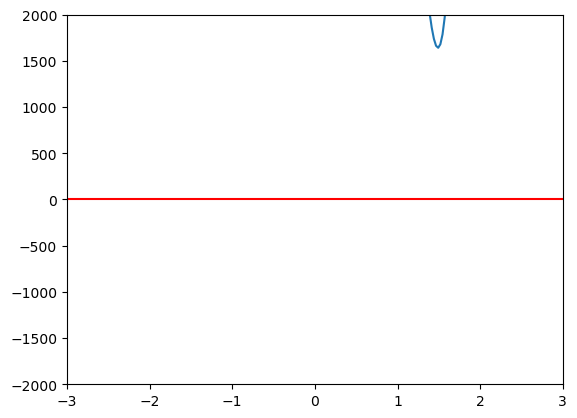

p2= 3.6


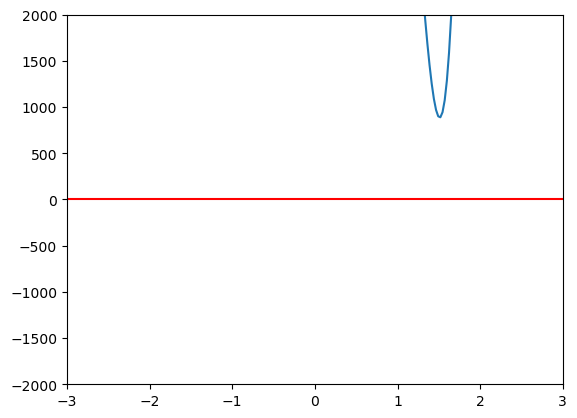

p2= 3.7


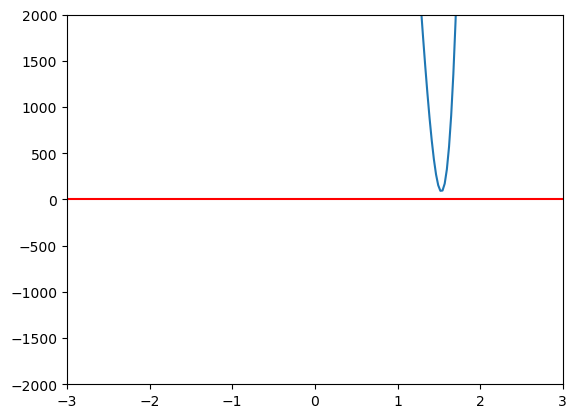

p2= 3.8


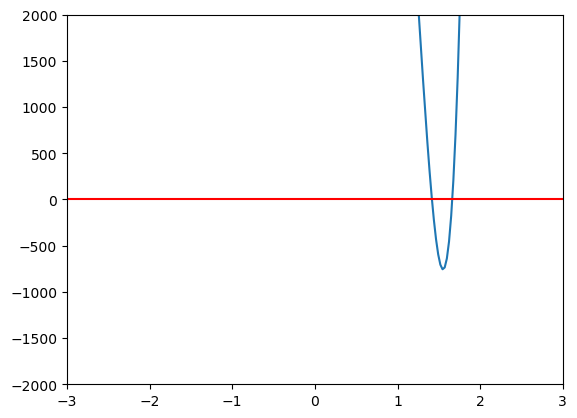

p2= 3.9


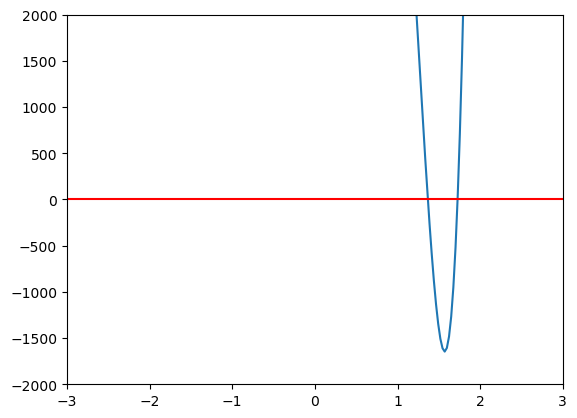

In [32]:
#Graphs the function for value from the minimum value (inclusive) to the maximum value (exclusive) at every tenth 
def visual_check_for_roots(min,max):        
    th_plot_6 = np.arange(-math.pi,math.pi,math.pi/120)
    min_adjust= int(min * 10)
    max_adjust= int(max * 10)
    for j in range( min_adjust, max_adjust):
        i = j/10
        f_theta_6 = f_param(3,3*2**(1/2),3,math.pi/4,5,0,6,5,i,3)
        f_plotgraph(th_plot_6,np.vectorize(f_theta_6)(th_plot_6),-3,3,-2000,2000)
        print("p2=",i)
        plt.show()

# Graphing different values for strut length p2- isolating the interval for zero roots, 0<p2<4
visual_check_for_roots(3.5,4)

There are zero roots from (0,3.7]

p2= 4.5


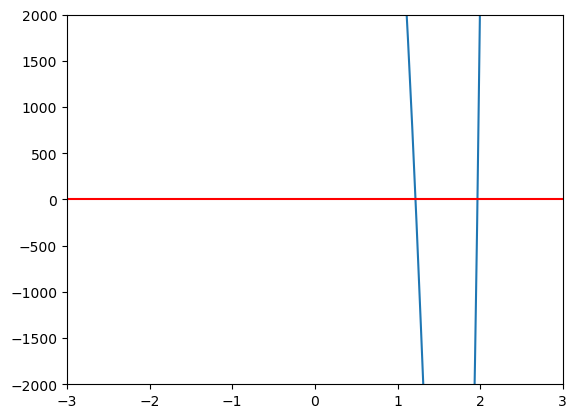

p2= 4.6


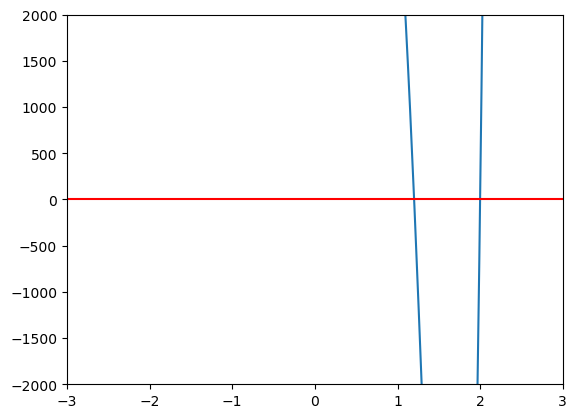

p2= 4.7


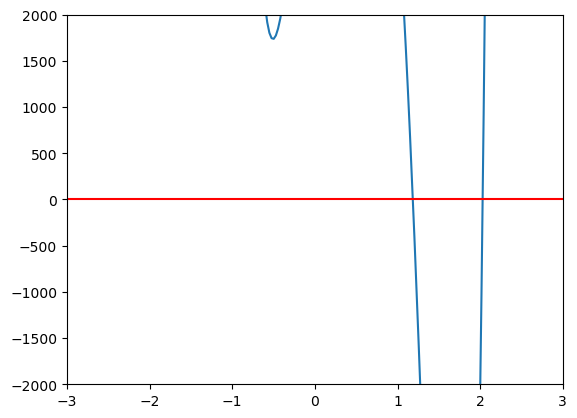

p2= 4.8


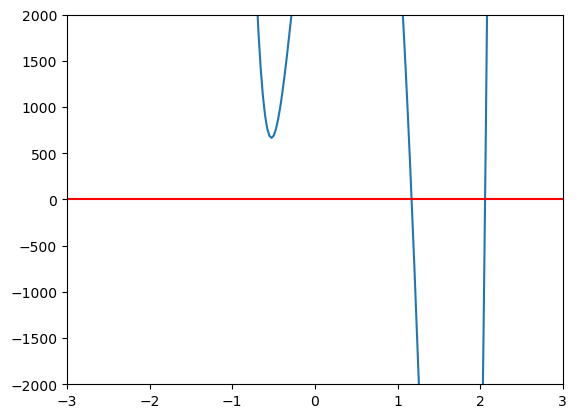

p2= 4.9


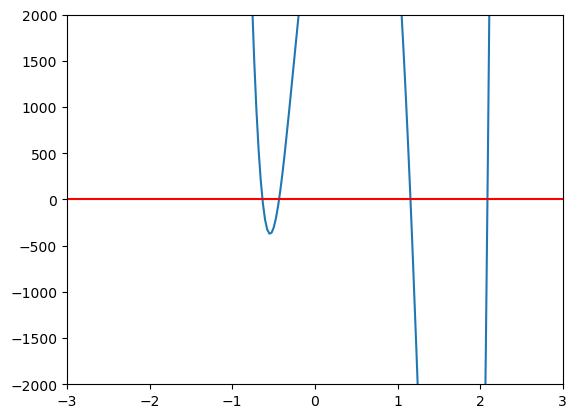

In [33]:
# Graphing different values for strut length p2- isolating the interval for two roots, 3.8 < p2 < 5
visual_check_for_roots(4.5,5)

There are two roots from [3.8, 4.8]

p2= 6.5


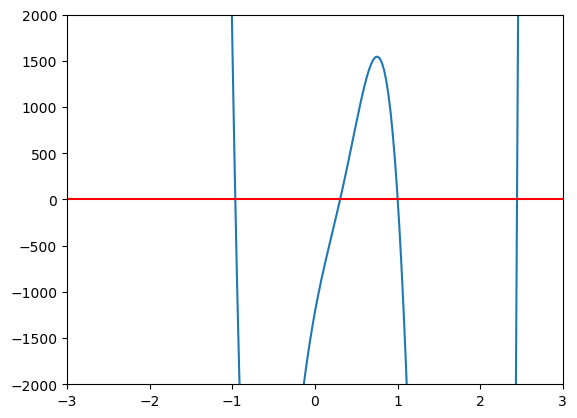

p2= 6.6


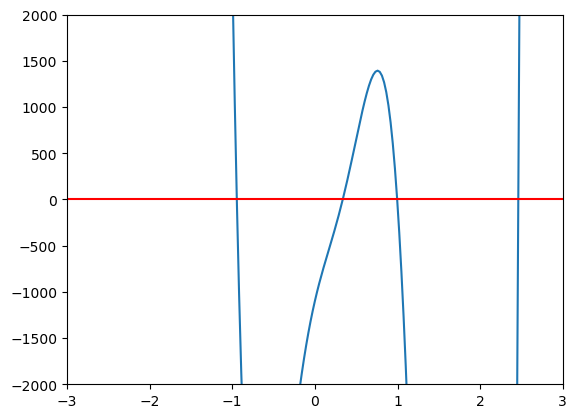

p2= 6.7


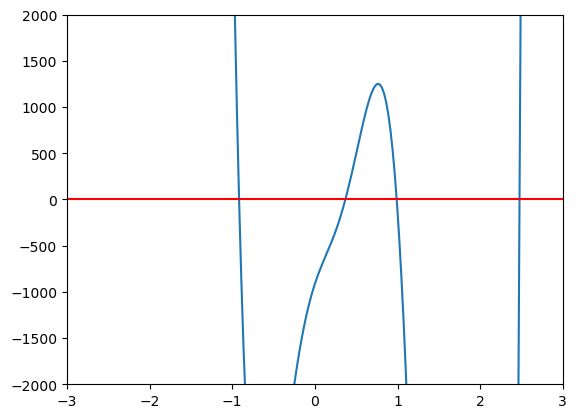

p2= 6.8


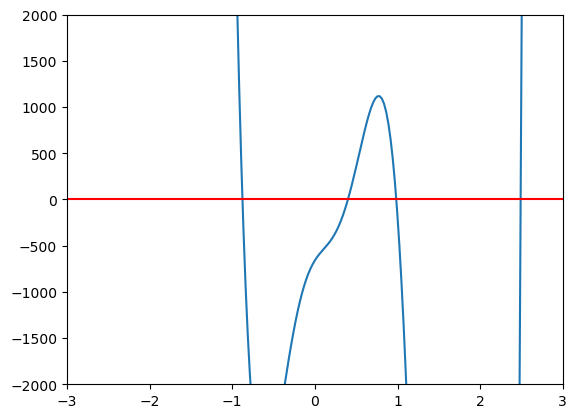

p2= 6.9


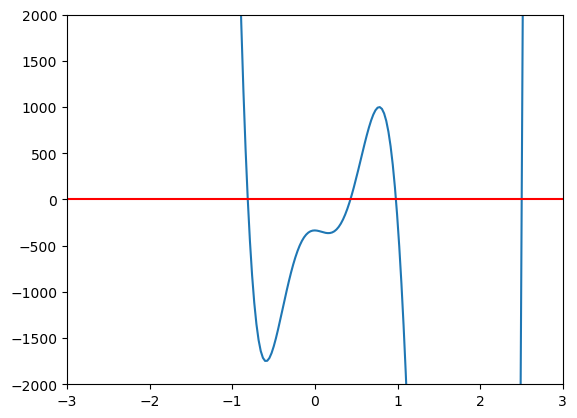

p2= 7.0


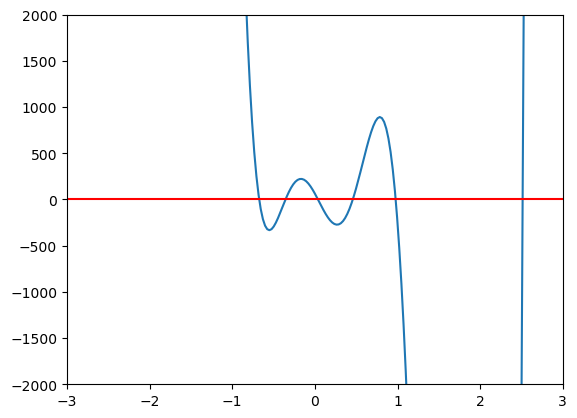

In [34]:
# Graphing different values for strut length p2- isolating the interval for four roots, 4.9<p2<7
visual_check_for_roots(6.5,7.1)

There are four roots in [4.9, 6.9]

p2= 7.0


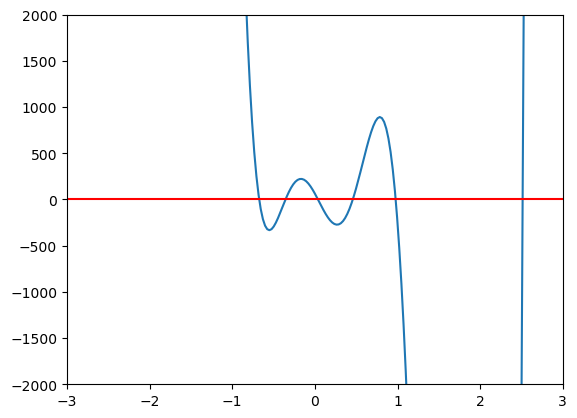

p2= 7.1


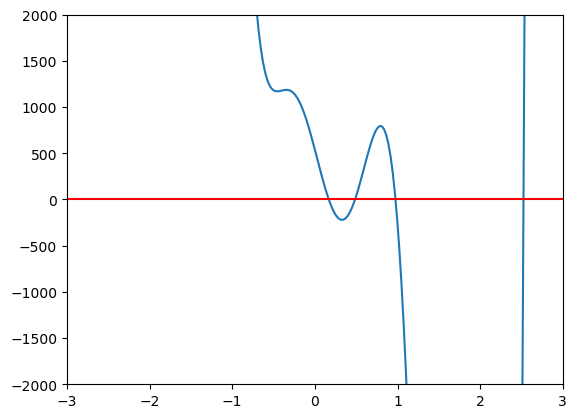

In [35]:
# Graphing different values for strut length p2- isolating the interval for six roots, 7<p2<8
visual_check_for_roots(7,7.2)

There are six roots at 7

p2= 7.0


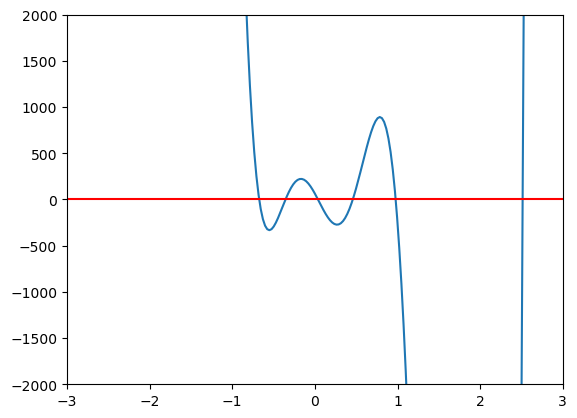

p2= 7.1


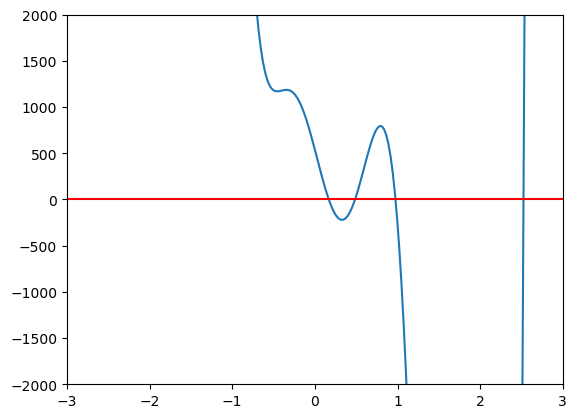

p2= 7.2


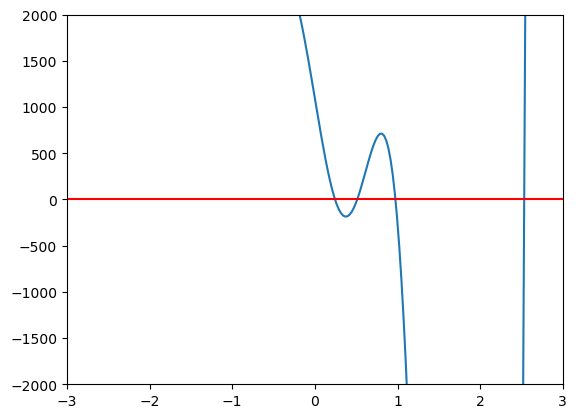

p2= 7.3


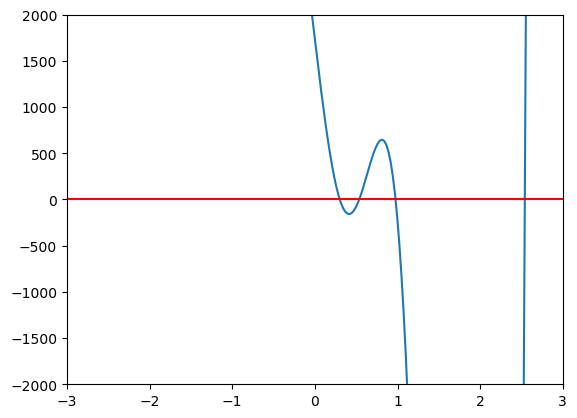

p2= 7.4


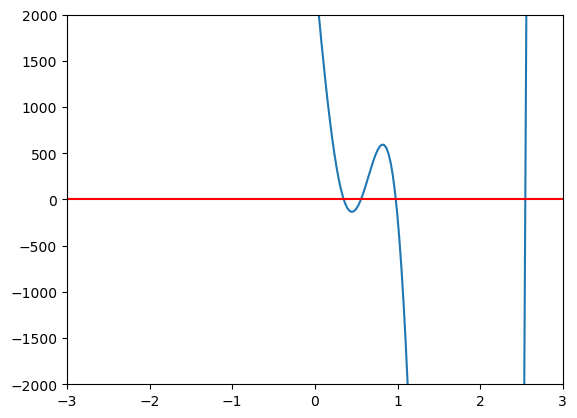

p2= 7.5


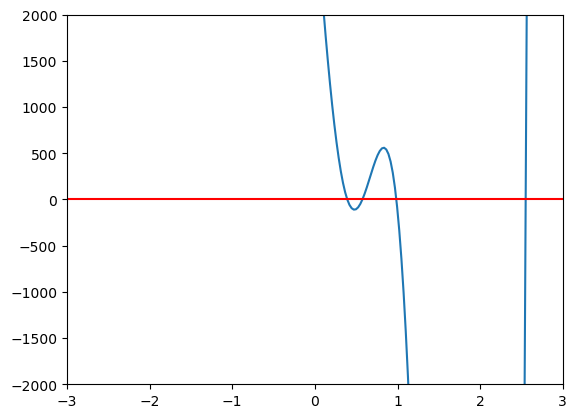

p2= 7.6


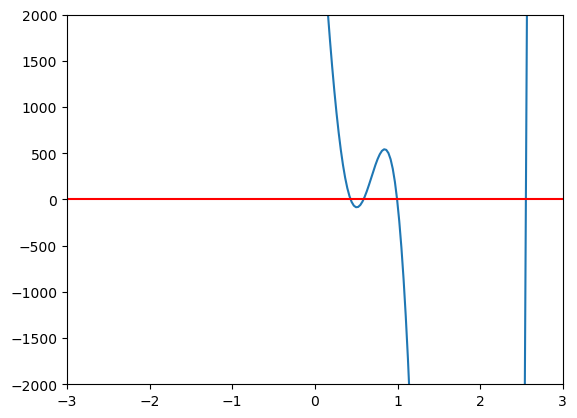

p2= 7.7


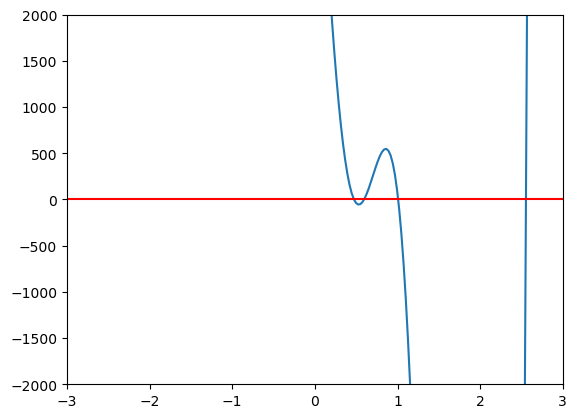

p2= 7.8


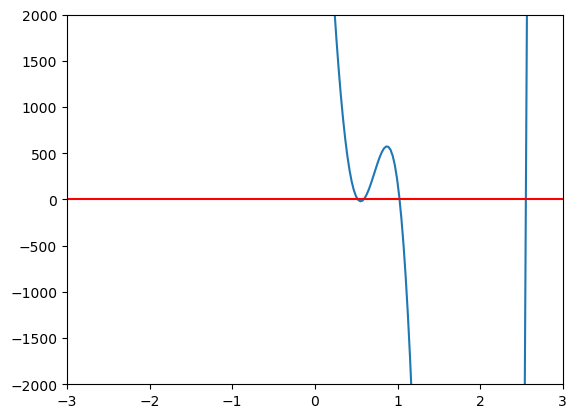

p2= 7.9


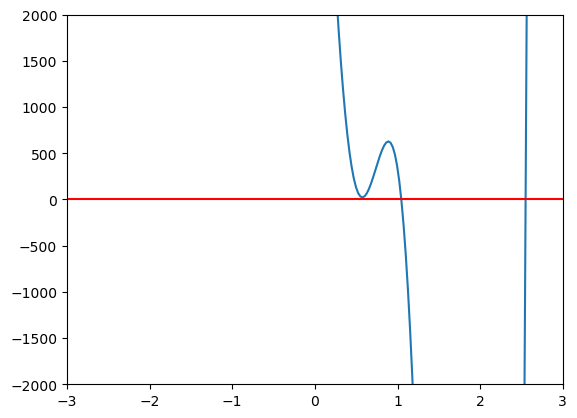

In [36]:
# Graphing different values for strut length p2- isolating the interval for four roots, 7<p2<8
visual_check_for_roots(7,8)

There are four roots in [7.1, 7.8]

p2= 9.1


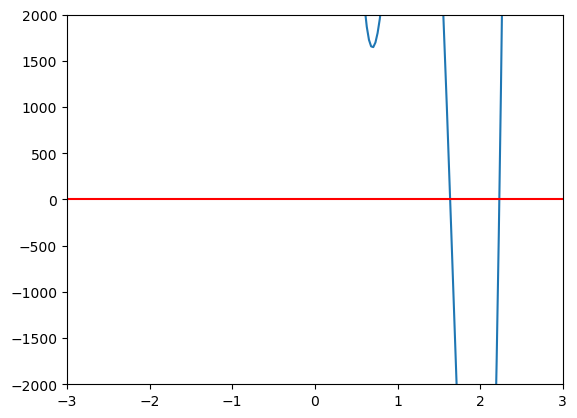

p2= 9.2


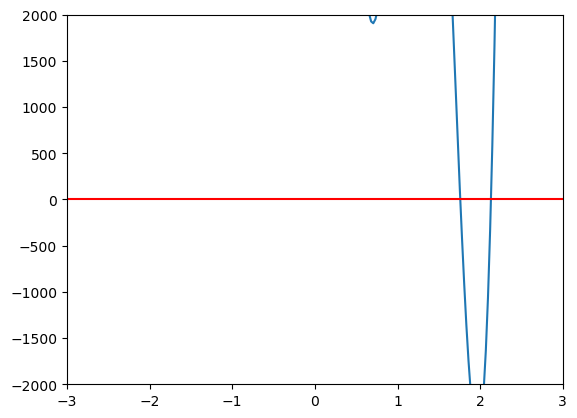

p2= 9.3


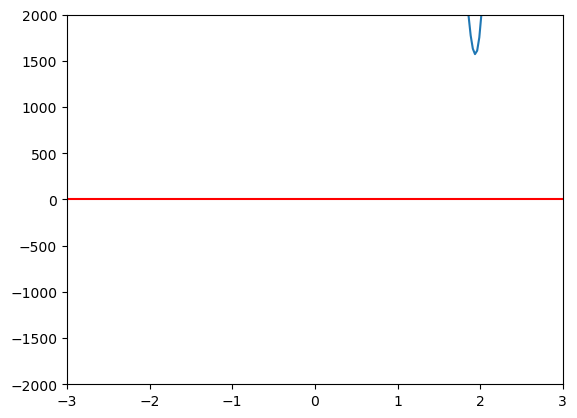

p2= 9.4


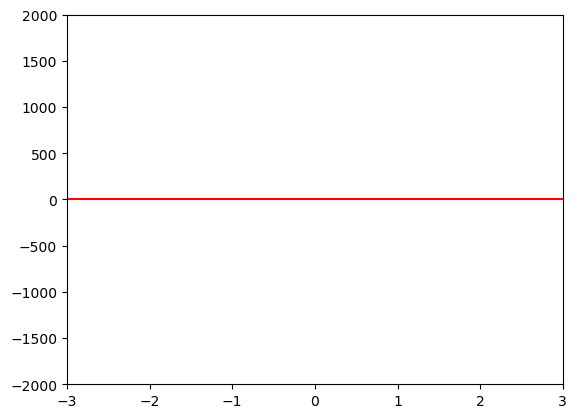

p2= 9.5


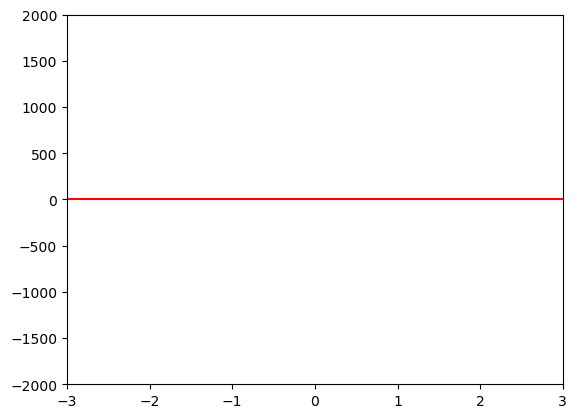

In [37]:
# Graphing different values for strut length p2- isolating the interval for two roots, 7.9<p2<9.5
visual_check_for_roots(9.1,9.6)

There are two roots in [7.9, 9.2]

There are zero roots in p2 >= 9.3.
In conclusion, there are zero roots in: [0, 3.7],[9.3, )
                        two roots in:   [3.8, 4.8],[7.9, 9.2]
                        four roots in:  [4.9, 6.9],[7.1, 7.8]
                        six roots at:   7